In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("smart_home_device_usage_data.csv")
df

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1


In [3]:
df.shape

(5403, 8)

In [4]:
df.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [6]:
df['DeviceType'].value_counts()

DeviceType
Smart Speaker      1108
Camera             1101
Lights             1087
Security System    1068
Thermostat         1039
Name: count, dtype: int64

In [7]:
device= {
    'Smart Speaker': 1,
    'Camera': 2,
    'Lights': 3,
    'Security System': 4,
    'Thermostat': 5
}

df['DeviceType'] = df['DeviceType'].map(device)

In [8]:
df.describe()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,2.968351,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,1.410779,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,2.000000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,3.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,4.000000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,5.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


### Analysis

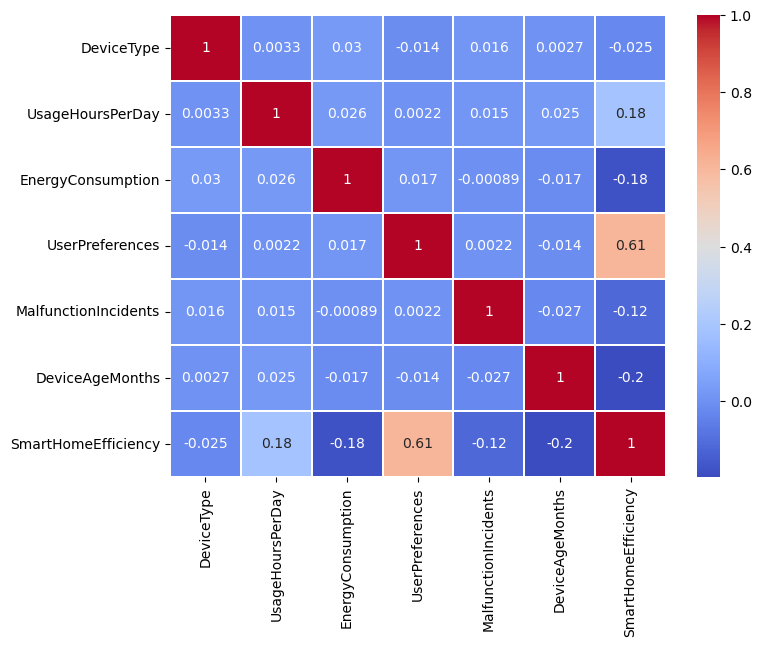

In [9]:
df= df.drop(columns=['UserID'])
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidth= 0.2)
plt.show()

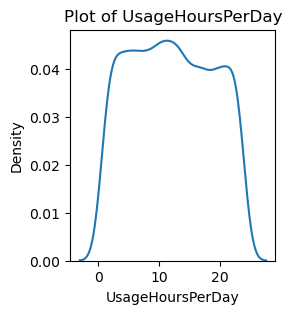

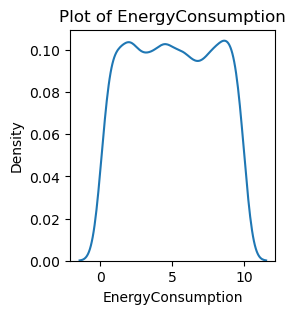

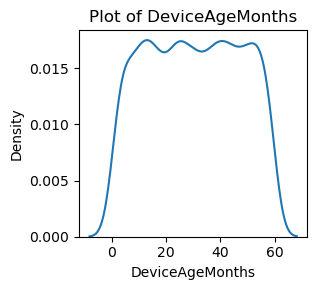

In [10]:
cols=["UsageHoursPerDay", "EnergyConsumption", "DeviceAgeMonths"]

length= len(cols)
row= (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize=(9,3))
    plt.subplot(row,3,i+1)
    plt.title(f'Plot of {variable}')
    sns.kdeplot(df[variable])
    
plt.tight_layout()
plt.show()    

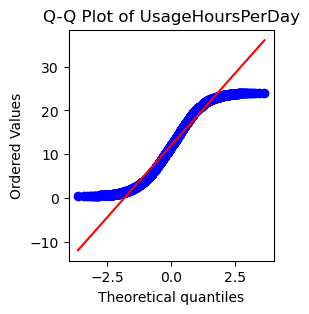

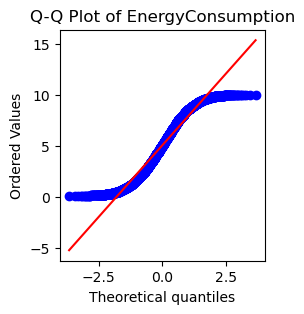

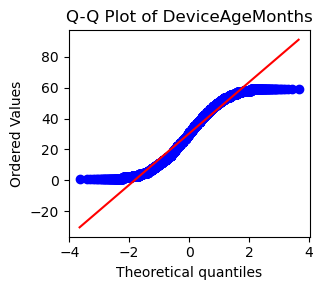

In [11]:
import scipy.stats as stats
col= ["UsageHoursPerDay", "EnergyConsumption", "DeviceAgeMonths"]

length= len(col)
row= (length+2)//3

for j,var in enumerate(col):
    plt.figure(figsize=(9,3))
    plt.subplot(row,3,j+1)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
plt.tight_layout()   
plt.show()

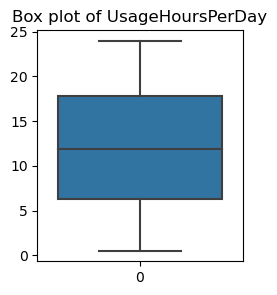

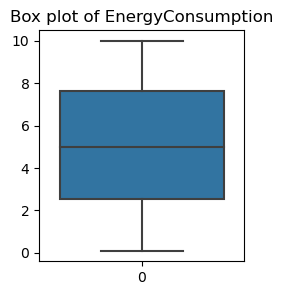

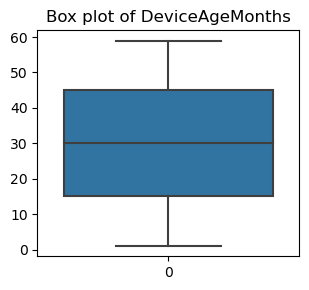

In [12]:
for k,var in enumerate(col):
    plt.figure(figsize=(9,3))
    plt.subplot(row,3,k+1)
    sns.boxplot(df[var])
    plt.title(f'Box plot of {var}')
    
plt.tight_layout()
plt.show()


### No Outliers are present

### train_test_split 

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
X= df.drop(columns=['SmartHomeEfficiency'])
y= df['SmartHomeEfficiency']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

### Decion Tree Classifier 

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
y_pred_dt= dt.predict(X_test_scaled)
accuracy_score(y_pred_dt,y_test)

0.8877236273904997

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [7,10],
    'min_samples_split': [18,25,20],
    'min_samples_leaf': [10,12,18]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7, 10],
                         'min_samples_leaf': [10, 12, 18],
                         'min_samples_split': [18, 25, 20],
                         'splitter': ['best', 'random']},
             verbose=2)

In [18]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 18,
 'min_samples_split': 18,
 'splitter': 'best'}

In [19]:
best_clf = grid_search.best_estimator_
grid_pred_dt = best_clf.predict(X_test_scaled)
accuracy_score(grid_pred_dt, y_test)

0.9561998766193708

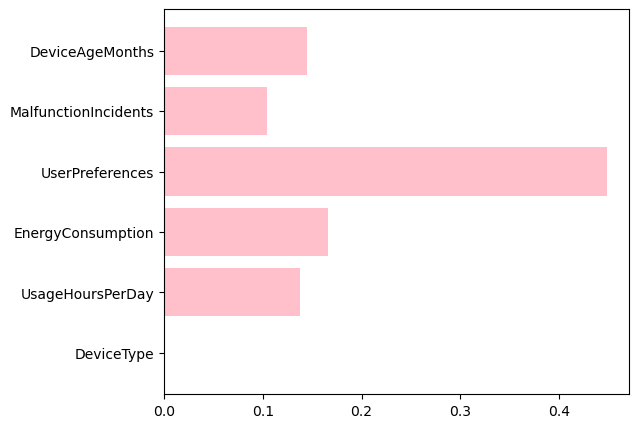

In [20]:
feature_importance= best_clf.feature_importances_
features= X_train.columns

plt.figure(figsize=(6,5))
plt.barh(features, feature_importance, color='pink')
plt.show()

### RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

rf.fit(X_train_scaled,y_train)
y_pred_rf= rf.predict(X_test_scaled)
accuracy_score(y_pred_rf,y_test)

0.9543491671807526

In [22]:
param_grid= {
    'max_features':['sqrt','log2',None],
    'max_samples':[0.5, 0.75],
    'max_depth':[5,7],
    'min_samples_split':[10,15,25],
}

rf_grid= GridSearchCV(estimator= rf,
                     param_grid=param_grid,
                     verbose=2,
                      cv=5,
                     n_jobs=-1)

In [23]:
rf_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.5, 0.75],
                         'min_samples_split': [10, 15, 25]},
             verbose=2)

In [24]:
best_rf= rf_grid.best_estimator_

y_grid_rf= best_rf.predict(X_test_scaled)
accuracy_score(y_test,y_grid_rf)

0.9549660703269587

In [25]:
rf_grid.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_samples': 0.5,
 'min_samples_split': 15}

### XGBoost

In [36]:
import xgboost as xgb

In [42]:
xg= xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xg.fit(X_train_scaled,y_train)
y_pred_xg= rf.predict(X_test_scaled)
accuracy_score(y_pred_xg,y_test)

0.9543491671807526

In [48]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [6, 7,8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(xg, param_distributions=param_grid, n_iter=50, scoring='accuracy', n_jobs=-1, cv=3, random_state=42, verbose=1)
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [49]:
best_params = random_search.best_params_
print(best_params)

best_model =random_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [50]:
y_random_xg= best_model.predict(X_test_scaled)
accuracy_score(y_test, y_random_xg)

0.9555829734731647

### ANN

In [26]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [27]:
X_train.shape

(3782, 6)

In [28]:
model= Sequential()

model.add(Dense(64,activation='relu',input_dim=6))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [29]:
adam= Adam(learning_rate=0.001)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,793 (132.00 KB)

 Trainable params: 33,793 (132.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
old_weights= model.get_weights()[0]
callback= EarlyStopping(
    monitor= "val_loss",
    min_delta= 0.0001,
    patience= 20,
    verbose= 1,
    mode= "auto",
    baseline=None,
    restore_best_weights= True)

In [31]:
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [32]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test), batch_size=1, callbacks= callback)

Epoch 1/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7416 - loss: 0.5298 - val_accuracy: 0.8692 - val_loss: 0.4040
Epoch 2/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8532 - loss: 0.4070 - val_accuracy: 0.8797 - val_loss: 0.3486
Epoch 3/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8657 - loss: 0.4083 - val_accuracy: 0.8705 - val_loss: 0.4316
Epoch 4/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8723 - loss: 0.3818 - val_accuracy: 0.8927 - val_loss: 0.4065
Epoch 5/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8812 - loss: 0.3743 - val_accuracy: 0.8939 - val_loss: 0.3865
Epoch 6/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8845 - loss: 0.3781 - val_accuracy: 0.8834 - val_loss: 0.3296
Epoch 7/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8801 - loss: 0.3737 - val_accuracy: 0.9038 - val_loss: 0.3033
Epoch 8/100
3782/3782 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8820 -

In [33]:
y_pred_probab= model.predict(X_test_scaled)
y_pred_final= np.where(y_pred_probab>0.5,1,0)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [51]:
accuracy_score(y_test,y_pred_final)

0.9062307217766811

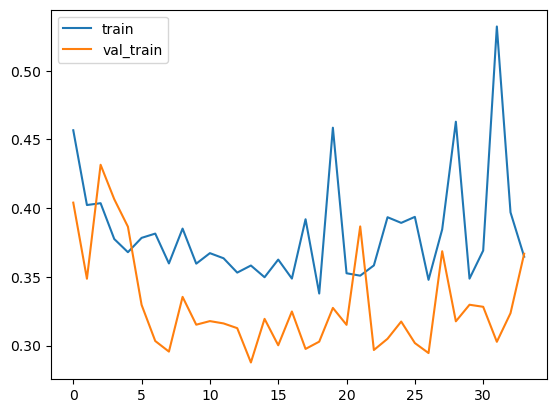

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.legend()
plt.show()

### Accuracy achieved is 95% with algorithms Decision Tree Classifier, Random Forest and XGBoost. ANN gives 90% accuracy.